In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [7]:
import numpy as np
import pandas as pd
import pickle
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
amp_file = '/Users/bogao/DataFiles/Data/feature/feature_amp_genes.tsv'
del_file = '/Users/bogao/DataFiles/Data/feature/feature_del_genes.tsv'

damp = pd.read_csv(amp_file, sep='\t')
ddel = pd.read_csv(del_file, sep='\t')

damp['type'] = 'amp'
ddel['type'] = 'del'

In [218]:
dislist =   {'Brain Astrocytoma':['94003', '94013'],
  'Brain Glioma':['93803', '94403'],
  'Brain Mixed glioma':['93823'],
  'Brain Oligodendroglioma':['94503', '94513'],
  'Brain Primitive neuroectodermal tumor':['94733'],
  
  'Breast Infiltrating duct carcinoma':['85003'],
  'Breast Intraductal carcinoma':['85002'],
  'Breast Lobular carcinoma':['85203'],
  
  'Cerebellum Medulloblastoma': ['94703','94713','94743'],
             
  'Colon Adenocarcinoma':['81403'],
  'Colon Adenocarcinoma intestinal type':['81443'],
  'Colon Adenoma':['81400'],
  'Colon Mucinous adenocarcinoma':['84803'],
  
  'Kidney Clear cell adenocarcinoma':['83103'],
  'Kidney Renal cell carcinoma':['83123', '83173'],
  
  'Liver Hepatocellular carcinoma':['81703'],
  
  'Lung Adenocarcinoma':['81403', '82553'],
  'Lung Carcinoma':['80103', '80123'],
  'Lung Non-small cell carcinoma':['80463'],
  'Lung Small cell carcinoma':['80413'],
  'Lung Squamous cell carcinoma':['80703'],
  
  'Ovary Adenocarcinoma':['81403', '83103', '83803'],
  'Ovary Carcinoma':['80103', '84413', '84421'],
  'Ovary Mucinous cystadenoma':['84700', '84800'],
  
  'Prostate Adenocarcinoma':['81403'],
  
  'Skin Melanoma':['87203', '87213', '87303'],
  
  'Stomach Adenocarcinoma':['81403'],
  'Stomach Adenocarcinoma intestinal type':['81443'],
  'Stomach Carcinoma diffuse type':['81453'],
  'Stomach Gastrointestinal stromal sarcoma':['89363'],
  'Stomach Tubular adenocarcinoma':['82113']}

In [219]:
distable = []
for k,v in dislist.items():
    for code in v:
        distable.append([k,code])

disease = pd.DataFrame(distable, columns=['name','code'])
disease_names = disease.name.unique()

## hotzones

In [220]:
fgene = pd.concat([damp,ddel]).reset_index(drop=True)
number_amps = 750

for name in disease_names:
    codes = disease.loc[disease['name'] == name, 'code'].values
    mx = data[np.isin(labels, codes)]
    
    ## compute average signals
    ave_amp = np.mean(mx, axis=0)
    fgene[name] = ave_amp

In [72]:
hot_amp = fgene[ (fgene['chr'].isin([7,8])) & (fgene['type'] == 'amp')]
hot_del = fgene[ (fgene['chr'].isin([4,10,18,22])) & (fgene['type'] == 'del')]

In [74]:
hotzones = pd.concat([hot_amp,hot_del]).reset_index(drop=True)

In [75]:
hotzones

,gene_id,name,chr,start,end,symbol,band,type,Brain Astrocytoma,Brain Glioma,...,Ovary Adenocarcinoma,Ovary Carcinoma,Ovary Mucinous cystadenoma,Prostate Adenocarcinoma,Skin Melanoma,Stomach Adenocarcinoma,Stomach Adenocarcinoma intestinal type,Stomach Carcinoma diffuse type,Stomach Gastrointestinal stromal sarcoma,Stomach Tubular adenocarcinoma
0,ENSG00000136193,p14.3,7,29920104,29990289,SCRN1,7p14.3,amp,0.222936,0.460910,...,0.263815,0.191963,0.022680,0.277574,0.398960,0.277574,0.304453,0.271846,0.069807,0.335604
1,ENSG00000106100,p14.3,7,30424527,30478784,NOD1,7p14.3,amp,0.218317,0.459203,...,0.263821,0.195138,0.022680,0.277580,0.396676,0.277580,0.302568,0.273986,0.069807,0.339377
2,ENSG00000240583,p14.3,7,30911694,30925517,AQP1,7p14.3,amp,0.220459,0.464004,...,0.264099,0.195509,0.022680,0.278049,0.401961,0.278049,0.303585,0.273986,0.069493,0.341553
3,ENSG00000106128,p14.3,7,30938669,30993254,GHRHR,7p14.3,amp,0.220459,0.463194,...,0.264360,0.196341,0.022680,0.278086,0.401925,0.278086,0.303585,0.273986,0.069493,0.341553
4,ENSG00000078549,p14.3,7,31052461,31111479,ADCYAP1R1,7p14.3,amp,0.219436,0.462244,...,0.264032,0.196724,0.022680,0.277732,0.400762,0.277732,0.303179,0.273986,0.069493,0.341553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,ENSG00000088756,p11.31,18,6729718,6915716,ARHGAP28,18p11.31,del,-0.126633,-0.153215,...,-0.361782,-0.340128,-0.006142,-0.403425,-0.326036,-0.403425,-0.261755,-0.239568,-0.174642,-0.195024
139,ENSG00000074657,q21.32,18,58862600,58986480,ZNF532,18q21.32,del,-0.140323,-0.150919,...,-0.361253,-0.332335,-0.005815,-0.401951,-0.292159,-0.401951,-0.259537,-0.260456,-0.150862,-0.197623
140,ENSG00000183287,q21.32,18,59430939,59697662,CCBE1,18q21.32,del,-0.192006,-0.172759,...,-0.537719,-0.643268,-0.007407,-0.607974,-0.336633,-0.607974,-0.730953,-0.450607,-0.157243,-0.815037
141,ENSG00000166603,q21.32,18,60371062,60372775,MC4R,18q21.32,del,-0.192789,-0.173581,...,-0.544753,-0.652025,-0.007407,-0.616529,-0.339633,-0.616529,-0.719682,-0.454340,-0.157243,-0.787636


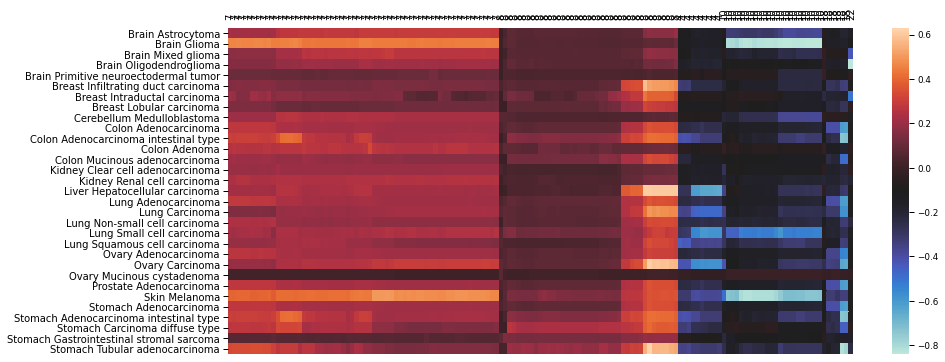

In [79]:
sns.set_context('paper')
plt.figure(figsize=(14,6))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

g = sns.heatmap(np.transpose(values), 

               cmap="icefire", 

               yticklabels=disease_names,
               xticklabels=hotzones['chr'],
              )
# plt.savefig('/Users/bogao/DataFiles/plots/newlandscape/new/focal_regional_heat.pdf',bbox_inches='tight')

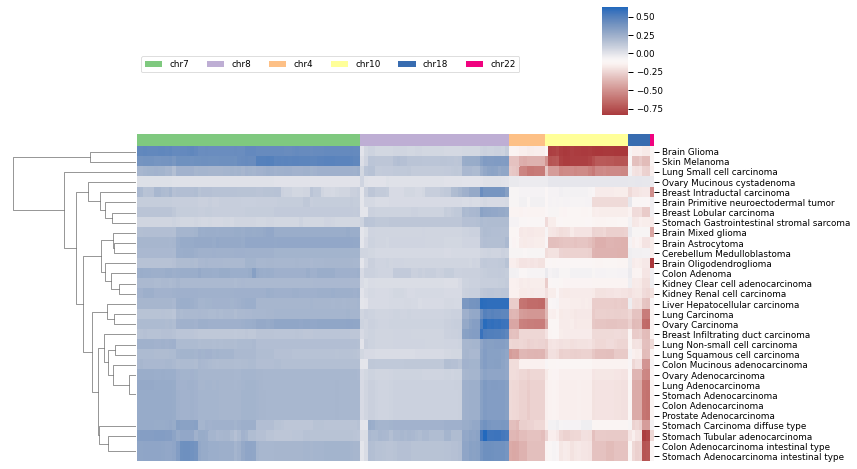

In [277]:

lut = dict(zip(hotzones['chr'].unique(), sns.color_palette('Accent')))
col_colors = hotzones['chr'].map(lut).to_numpy()

g = sns.clustermap(data = np.transpose(values),
#               row_cluster=None,
              col_cluster=None,
              cmap='vlag_r',
               col_colors=col_colors,
               xticklabels = False,
               yticklabels = disease_names,
                   cbar_pos=(.7, .83, .03, .25),
                   figsize= (12,6)
              )

for label in hotzones['chr'].unique():
    g.ax_col_dendrogram.bar(0, 0, color=lut[label],
                            label='chr' + str(label), linewidth=0)
g.ax_col_dendrogram.legend(loc="upper left", ncol=6)
plt.savefig('/Users/bogao/DataFiles/plots/newlandscape/new/hotzone_heat.pdf',bbox_inches='tight')